In [ ]:
!pip install plotly

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [ ]:
pip freeze

absl-py==0.12.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
appdirs==1.4.4
argcomplete==1.12.3
argon2-cffi==21.1.0
arviz==0.11.4
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
atari-py==0.2.9
atomicwrites==1.4.0
attrs==21.2.0
audioread==2.1.9
autograd==1.3
Babel==2.9.1
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==4.1.0
blis==0.4.1
bokeh==2.3.3
Bottleneck==1.3.2
branca==0.4.2
bs4==0.0.1
CacheControl==0.12.10
cached-property==1.5.2
cachetools==4.2.4
catalogue==1.0.0
certifi==2021.10.8
cffi==1.15.0
cftime==1.5.1.1
chardet==3.0.4
charset-normalizer==2.0.7
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.9.5
colorcet==2.0.6
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.3.2
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.2.7
cvxpy==1.0.31
cycler==0.11.0
cymem==2.0.6
Cython==0.29.24
daft==0.0.4
dask==2.12.0
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.7.1
descartes==1.1.0
dill==0.3.4
distributed==1.25.3


In [ ]:
import plotly.express as px

In [ ]:
data=pd.read_csv("vgsales.csv")

In [ ]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
data.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [ ]:
data.shape

(16598, 11)

In [ ]:
data.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [ ]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
data.nunique()

Rank            16598
Name            11493
Platform           31
Year               39
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

In [ ]:
data["Platform"].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [ ]:
data["Genre"].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [ ]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
data=data.dropna(subset=['Publisher','Year'],axis=0)
data=data.reset_index(drop=True)
data.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [ ]:
data["Year"]=data["Year"].astype(int)
data["Year"].dtype

dtype('int64')

In [ ]:
data["Year"].groupby(data["Year"]).count()

Year
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     349
2001     482
2002     829
2003     775
2004     744
2005     936
2006    1008
2007    1201
2008    1428
2009    1431
2010    1257
2011    1136
2012     655
2013     546
2014     580
2015     614
2016     342
2017       3
2020       1
Name: Year, dtype: int64

In [ ]:
data.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16286,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16287,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16288,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16289,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16290,16600,Spirits & Spells,GBA,2003,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [ ]:
corelation=data.corr()

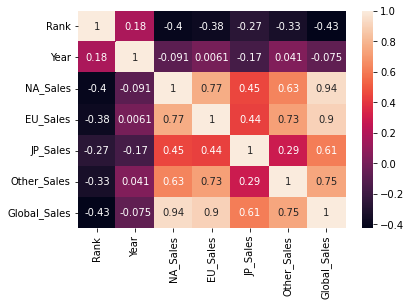

In [ ]:
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

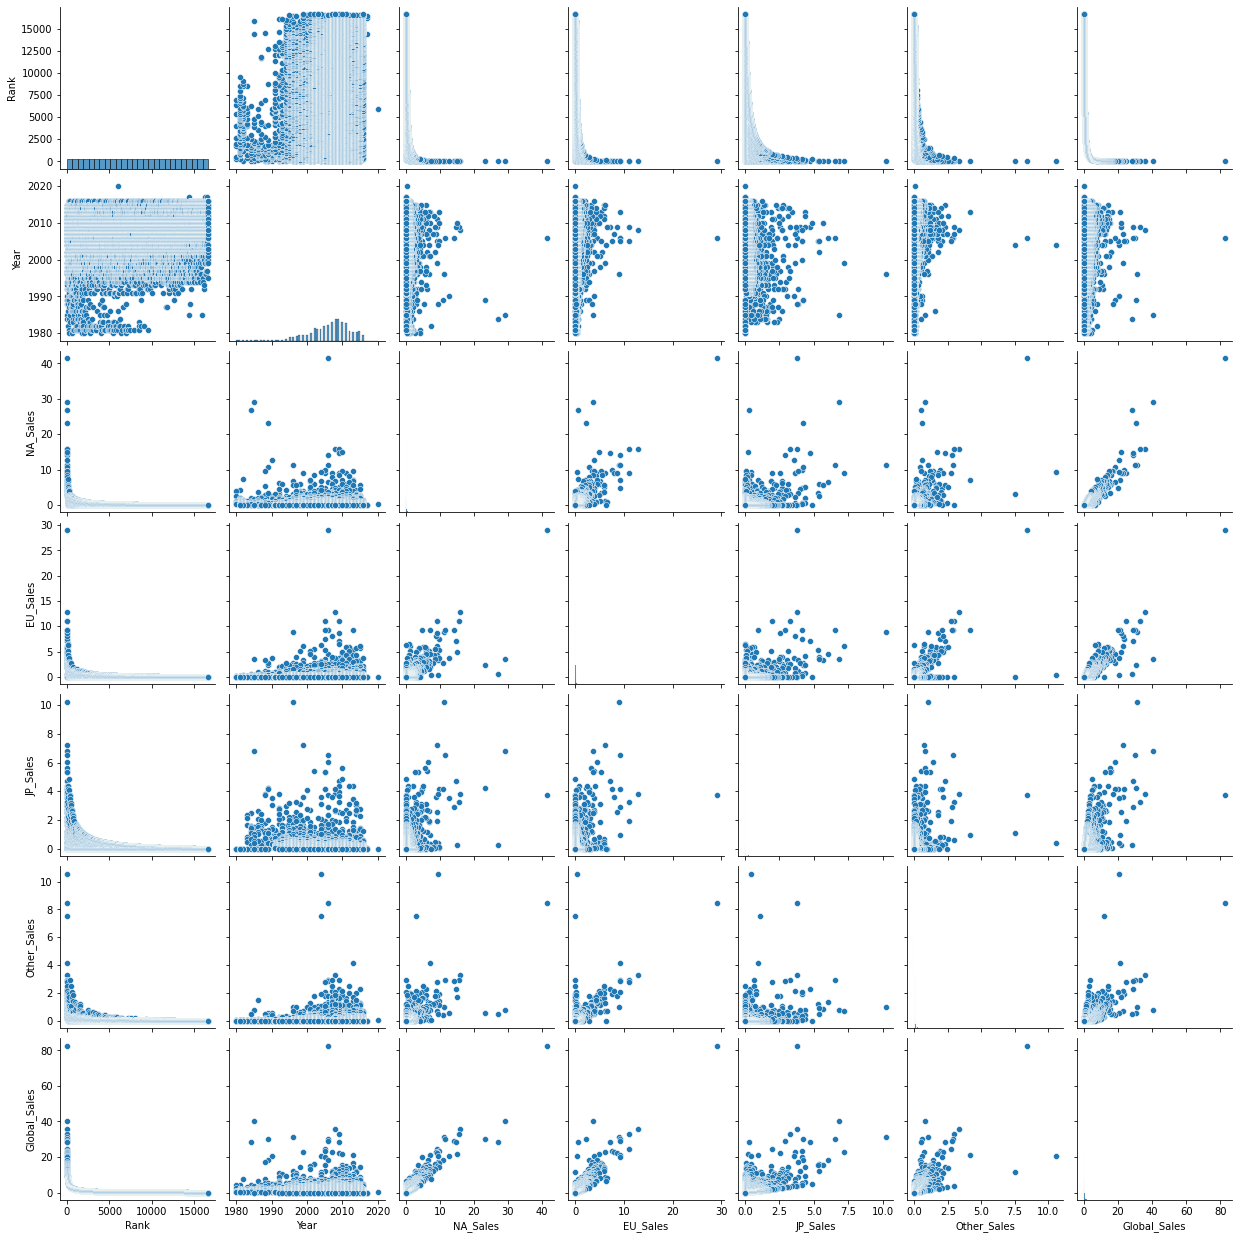

In [ ]:
sns.pairplot(data)

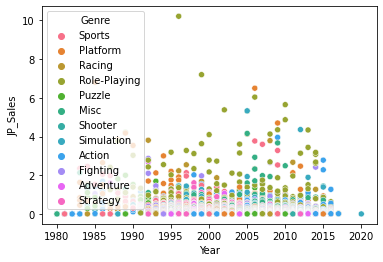

In [ ]:
sns.scatterplot(x="Year",y="JP_Sales",hue="Genre",data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



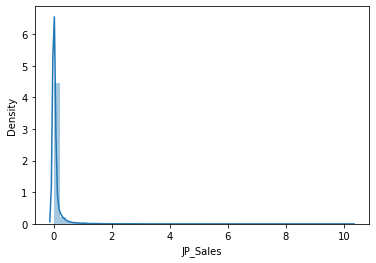

In [ ]:
sns.distplot(data['JP_Sales'],bins=50)

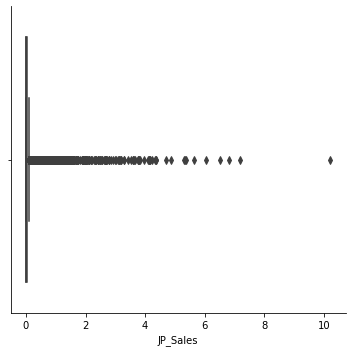

In [ ]:
sns.catplot(x='JP_Sales',kind='box',data=data)

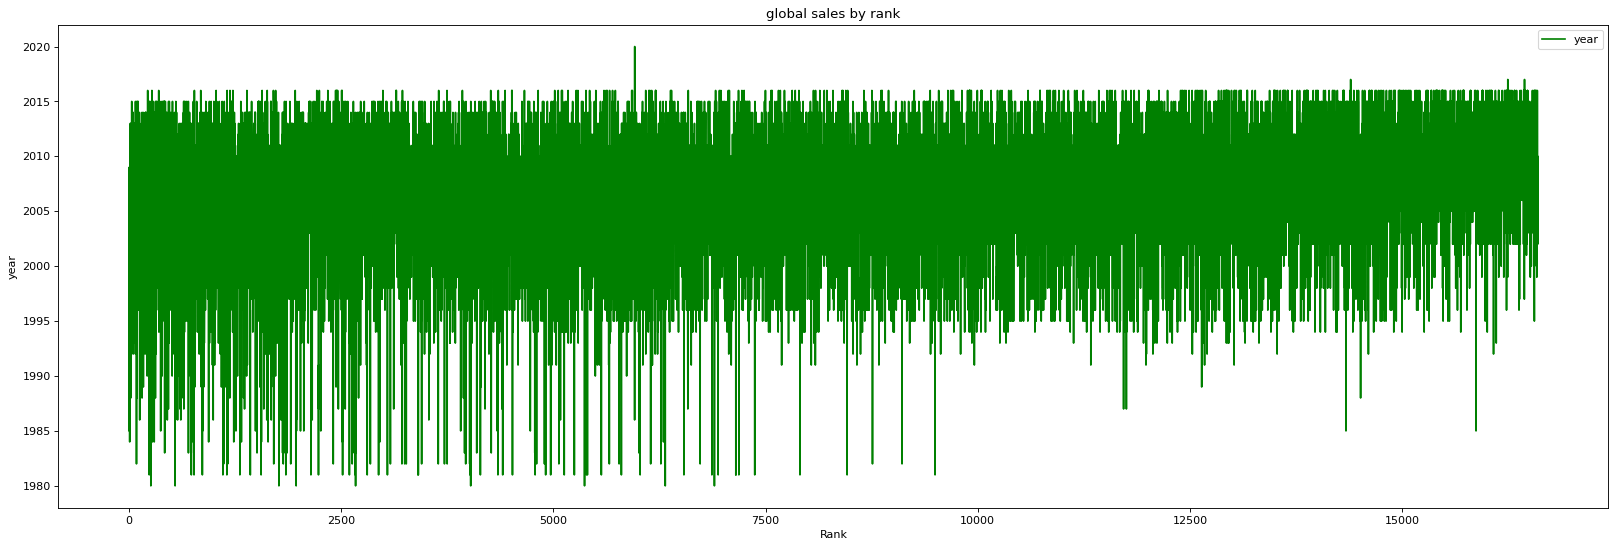

In [ ]:
x=data['Rank']
y=data['Year']
plt.figure(figsize=(25,8),dpi=80)
plt.plot(x,y,label='year',color='green')
plt.xlabel("Rank")
plt.ylabel("year")
plt.title("global sales by rank")
plt.legend()
plt.show()

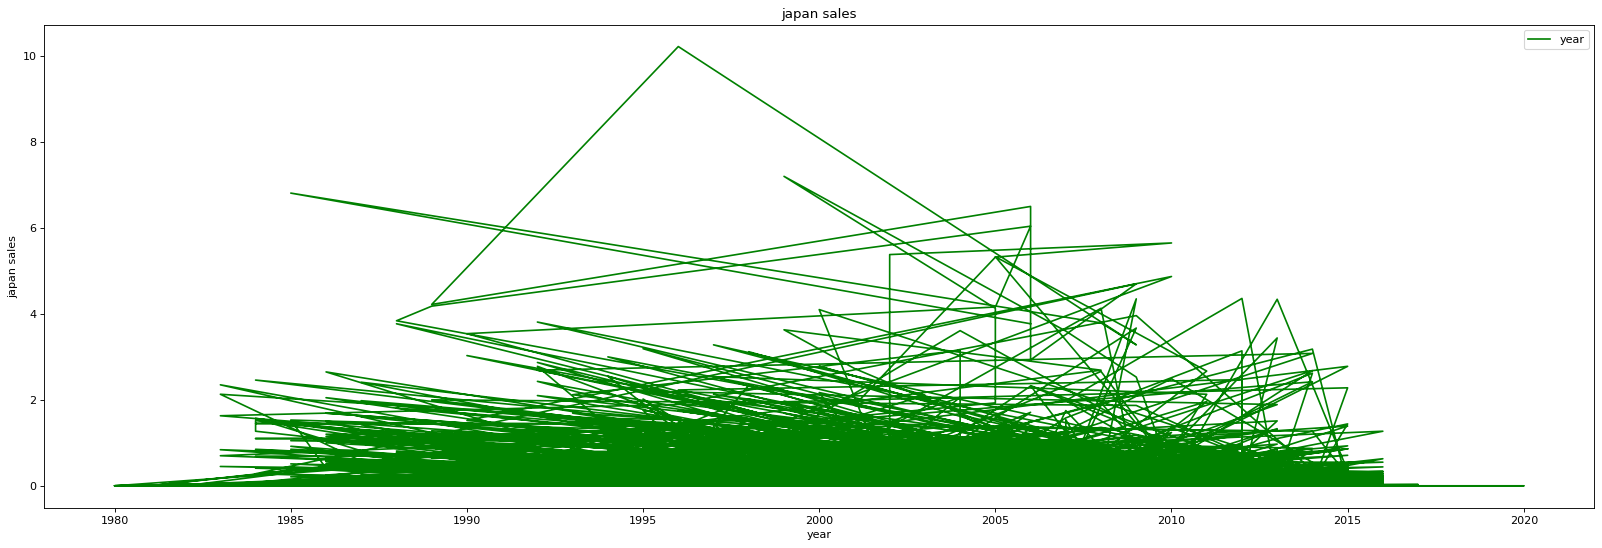

In [ ]:
x=data['Year']
y=data['JP_Sales']
plt.figure(figsize=(25,8),dpi=80)
plt.plot(x,y,label='year',color='green')
plt.xlabel("year")
plt.ylabel("japan sales")
plt.title("japan sales")
plt.legend()
plt.show()

In [ ]:
AnnualNumberOfGames = data['Year'].groupby(data['Year']).count()

fig = px.line(AnnualNumberOfGames, x=AnnualNumberOfGames.index, y=AnnualNumberOfGames,
              labels={
                  "index": "Year",
                  "y": "Number of Games Published"
              }
              )
fig.update_layout(title_text='Number of Games Published Annually',
                  title_x=0.5, title_font=dict(size=24))

fig.show()

In [ ]:
data['Genre'].groupby(data['Genre']).count()

Genre
Action          3251
Adventure       1274
Fighting         836
Misc            1686
Platform         875
Puzzle           570
Racing          1225
Role-Playing    1470
Shooter         1282
Simulation       848
Sports          2304
Strategy         670
Name: Genre, dtype: int64

In [ ]:
typesofgames= data['Genre'].groupby(data['Genre']).count()

fig = px.line(typesofgames, x=typesofgames.index, y=typesofgames,
              labels={
                  "index": "Genre",
                  "y": "Genre of game"
              }
              )
fig.update_layout(title_text='Genre of game',
                  title_x=0.5, title_font=dict(size=24))

fig.show()

In [ ]:
typesofgames.index

Index(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'],
      dtype='object', name='Genre')

In [ ]:
AnnualSalesMarket = data.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter(x=AnnualSalesMarket['Year'], y=AnnualSalesMarket['NA_Sales'],
                         name="North America Sales",
                         hovertext=AnnualSalesMarket['NA_Sales']))

fig.add_trace(go.Scatter(x=AnnualSalesMarket['Year'], y=AnnualSalesMarket['EU_Sales'],
                         name="Europe Sales",
                         hovertext=AnnualSalesMarket['EU_Sales']))

fig.add_trace(go.Scatter(x=AnnualSalesMarket['Year'], y=AnnualSalesMarket['JP_Sales'],
                         name="Japan Sales",
                         hovertext=AnnualSalesMarket['JP_Sales']))

fig.add_trace(go.Scatter(x=AnnualSalesMarket['Year'], y=AnnualSalesMarket['Other_Sales'],
                         name="Other Sales",
                         hovertext=AnnualSalesMarket['Other_Sales']))

fig.update_layout(title_text='Video Game Sales for each Market Annually',
                  title_x=0.5, title_font=dict(size=22))
fig.update_layout(
    xaxis_title="Years",
    yaxis_title="Sales (M)")

fig.show()

In [ ]:
PublisherTotalGames=data['Global_Sales'].groupby(data['Publisher']).sum().sort_values(ascending=False).to_frame()
PublisherTotalGames_top=PublisherTotalGames.nlargest(15,'Global_Sales')[['Global_Sales']]
fig=px.bar(data_frame=PublisherTotalGames_top,x=PublisherTotalGames_top.index,y="Global_Sales",color = PublisherTotalGames_top.index)
fig.update_layout(title_text='Top 15 Publishers that have the highest Global Sales',title_x=0.5, title_font=dict(size=20))
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.update_traces(marker=dict(line=dict(color='#ff7f0e', width=2)))
fig.show()

In [ ]:
PublisherTotalGames

,Global_Sales
Publisher,
Nintendo,1784.43
Electronic Arts,1093.39
Activision,721.41
Sony Computer Entertainment,607.28
Ubisoft,473.54
...,...
Michaelsoft,0.01
Media Entertainment,0.01
Takuyo,0.01


In [ ]:
PublisherTotalGames_top

,Global_Sales
Publisher,
Nintendo,1784.43
Electronic Arts,1093.39
Activision,721.41
Sony Computer Entertainment,607.28
Ubisoft,473.54
Take-Two Interactive,399.30
THQ,340.44
Konami Digital Entertainment,278.56
Sega,270.70


In [ ]:
fig

In [ ]:
TopSellingGames=data['Global_Sales'].groupby(data['Name']).sum().sort_values(ascending=False).to_frame()
TopSellingGames_top=TopSellingGames.nlargest(15,'Global_Sales')[['Global_Sales']]
fig=px.bar(data_frame=TopSellingGames_top,x=TopSellingGames_top.index,y="Global_Sales",color=TopSellingGames_top.index)
fig.update_layout(title_text='Top 15 top selling games',title_x=0.5, title_font=dict(size=20))
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.show()

In [ ]:
GenreTotalGames = data['Global_Sales'].groupby(data['Genre']).sum().sort_values(ascending=False).to_frame()

fig = go.Figure(data=[go.Pie(labels=GenreTotalGames.index,
                             values=GenreTotalGames['Global_Sales'], opacity=0.9)])
fig.update_traces(textinfo='percent+label', marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Distribution of the Video Game Sales by Genre',
                  title_x=0.5, title_font=dict(size=22))
fig.show()

In [ ]:
Top50SellingGamesByPublisher=data.nlargest(50,'Global_Sales')[['Global_Sales','Name','Publisher']]
Top50SellingGamesByPublisher=Top50SellingGamesByPublisher.groupby(pd.Grouper(key='Publisher')).size().reset_index(name='Number of Games')
Top50SellingGamesByPublisher

,Publisher,Number of Games
0,Nintendo,32
1,Microsoft Game Studios,2
2,Take-Two Interactive,6
3,Sony Computer Entertainment,2
4,Activision,8


In [ ]:
fig=px.bar(data_frame=Top50SellingGamesByPublisher,x=Top50SellingGamesByPublisher['Publisher'],y='Number of Games',color=Top50SellingGamesByPublisher['Publisher'])
fig.update_layout(title_text='Distribution of Top Seller 50 Games by Publishers',title_x=0.5, title_font=dict(size=20))
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.show()


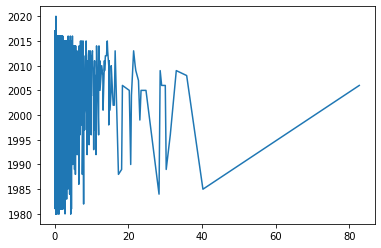

In [ ]:
plt.plot(data['Global_Sales'],data['Year'])
plt.show()

In [ ]:
GenreTotalGames = data['Global_Sales'].groupby(data['Genre']).sum().sort_values(ascending=False).to_frame()
GenreTotalGames

,Global_Sales
Genre,
Action,1722.84
Sports,1309.24
Shooter,1026.20
Role-Playing,923.83
Platform,829.13
Misc,789.87
Racing,726.76
Fighting,444.05
Simulation,389.98


In [ ]:
PublisherTotalGames=data['NA_Sales'].groupby(data['Publisher']).sum().sort_values(ascending=False).to_frame()
PublisherTotalGames_top=PublisherTotalGames.nlargest(15,'NA_Sales')[['NA_Sales']]
fig=px.bar(data_frame=PublisherTotalGames_top,x=PublisherTotalGames_top.index,y="NA_Sales",color = PublisherTotalGames_top.index)
fig.update_layout(title_text='Top 15 Publishers that have the highest North American Sales',title_x=0.5, title_font=dict(size=20))
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.update_traces(marker=dict(line=dict(color='#ff7f0e', width=2)))
fig.show()

In [ ]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
YearTotalGames=data['Global_Sales'].groupby(data['Year']).sum().sort_values(ascending=False).to_frame()
YearTotalGames_top=YearTotalGames.nlargest(15,'Global_Sales')[['Global_Sales']]
fig=px.bar(data_frame=YearTotalGames_top,x=YearTotalGames_top.index,y="Global_Sales",color = YearTotalGames_top.index)
fig.update_layout(title_text='Top 15 Years that have the highest Global Sales',title_x=0.5, title_font=dict(size=20))
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.update_traces(marker=dict(line=dict(color='#ff7f0e', width=2)))
fig.show()

In [ ]:
PublisherTotalGames=data['NA_Sales'].groupby(data['Publisher']).sum().sort_values(ascending=False).to_frame()
PublisherTotalGames_top=PublisherTotalGames.nlargest(15,'NA_Sales')[['NA_Sales']]
fig=px.bar(data_frame=PublisherTotalGames_top,x=PublisherTotalGames_top.index,y="NA_Sales",color = PublisherTotalGames_top.index)
fig.update_layout(title_text='Top 15 Publishers that have the highest North American Sales',title_x=0.5, title_font=dict(size=20))
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.update_traces(marker=dict(line=dict(color='#ff7f0e', width=2)))
fig.show()

In [ ]:
PublisherTotalGames=data['NA_Sales'].groupby(data['Publisher']).sum().sort_values(ascending=False).to_frame()
PublisherTotalGames_top=PublisherTotalGames.nlargest(15,'NA_Sales')[['NA_Sales']]
fig=px.bar(data_frame=PublisherTotalGames_top,x=PublisherTotalGames_top.index,y="NA_Sales",color = PublisherTotalGames_top.index)
fig.update_layout(title_text='Top 15 Publishers that have the highest North American Sales',title_x=0.5, title_font=dict(size=20))
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.update_traces(marker=dict(line=dict(color='#ff7f0e', width=2)))
fig.show()